In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
look_back = 15

In [4]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
type(df)

pandas.core.frame.DataFrame

In [5]:

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]


df["value"].values


array([3., 1., 3., ..., 2., 4., 2.])

In [12]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)


.]
[0.]
[4.]
[0.]
[4.]
[0.]
[5.]
[0.]
[4.]
[0.]
[4.]
[0.]
[4.]
[0.]
[5.]
[0.]
[4.]
[0.]
[4.]
[0.]
[4.]
[0.]
[6.]
[0.]
[5.]
[0.]
[5.]
[0.]
[5.]
[0.]
[4.]
[0.]
[6.]
[0.]
[4.]
[0.]
[4.]
[0.]
[4.]
[0.]
[5.]
[0.]
[4.]
[0.]
[5.]
[0.]
[5.]
[0.]
[6.]
[0.]
[5.]
[0.]
[5.]
[0.]
[5.]
[0.]
[7.]
[0.]
[7.]
[0.]
[5.]
[1.]
[5.]
[1.]
[5.]
[1.]
[5.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[7.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[5.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[1.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[4.]
[2.]
[4.]
[2.]
[5.]
[2.]
[5.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[3.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[5.]
[2.]
[7.]
[2.]
[6.]
[2.]
[6.]
[2.]
[4.]
[3.]
[4.]
[3.]
[4.]
[3.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4.]
[2.]
[4

In [44]:
train_generator.data

model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)


model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
3117/3117 [==============================] - 18s 6ms/step - loss: 1.3371
Epoch 2/25
3117/3117 [==============================] - 17s 6ms/step - loss: 1.0090
Epoch 3/25
3117/3117 [==============================] - 17s 6ms/step - loss: 0.9997
Epoch 4/25
3117/3117 [==============================] - 17s 6ms/step - loss: 0.9716
Epoch 5/25
3117/3117 [==============================] - 17s 6ms/step - loss: 0.9653
Epoch 6/25
3117/3117 [==============================] - 17s 6ms/step - loss: 0.9466
Epoch 7/25
3117/3117 [==============================] - 17s 6ms/step - loss: 0.9496
Epoch 8/25
3117/3117 [==============================] - 18s 6ms/step - loss: 0.9420
Epoch 9/25
3117/3117 [==============================] - 18s 6ms/step - loss: 0.9269
Epoch 10/25
3117/3117 [==============================] - 18s 6ms/step - loss: 0.9179
Epoch 11/25
3117/3117 [==============================] - 18s 6ms/step - loss: 0.9130
Epoch 12/25
3117/3117 [==============================] - 18s 6ms/step - lo

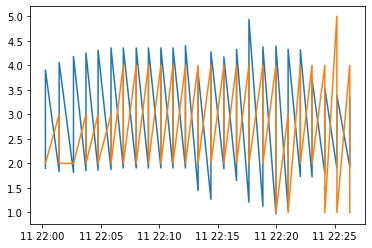

In [45]:
prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:50], prediction[:50])
plt.plot(date_test[:50], parking_test[:50])
plt.show()